<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Introduction to data visualisation



In this train, we will explore data visualisation using Python's Matplotlib package. We will learn how to implement various plotting techniques, distinguish between graph types, and choose the best visual representation for data.

## Learning objectives
By the end of this train, you should be able to:

* Implement various plotting techniques using Python's Matplotlib package.
* Distinguish between different types of graphs.
* Understand how to best represent data using a specific graph.
* Analyse and draw insights from graphs.


## Introduction


Data visualisation is the process of presenting data and information in graphical forms such as charts, maps, and diagrams. The goal of these graphics is to improve understanding of the underlying data by making patterns, trends, correlations, and outliers more visible than a simple study of the raw data.

There may be numerous occasions when we will need to share our data-driven results and insights. Unfortunately, raw data are not appropriate for this purpose. This is where maximising the potential of data visualisation becomes critical. In this train, we will learn how to visualise data using Python's graphing library, Matplotlib, as well as how to identify the appropriate visualisation approaches to apply based on the data we are given.

There are many different ways to represent the same data, and the choice of visualisation affects what information is conveyed to the audience. In this train, review some of the most basic (yet useful and reliable) chart options. 

Below is an image depicting some of the most popular charts used for data visualisation. 


<center><img src="https://raw.github.com/Explore-AI/Pictures/master/Introduction_to_data_visualisation_edit.jpeg?raw=true" style="float: center; padding-bottom=0.5em" width=80%/></center>

## Plotting graphs

In this section, we'll learn how to plot some of these graphs in Python using the `matplotlib` library.

We will begin by importing some commonly used Python libraries. 

In [1]:
# Import libraries 
import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used for loading CSV data

### Import data

For this train, we will be using [the tips](https://www.kaggle.com/jsphyg/tipping) dataset, which consists of customer tip data collected over a period of two and half months in early 1990 from one restaurant by a food server.

Let's go ahead and import our data.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")

### Data preparation

Preparing data before plotting in Python is essential for various reasons. Initially, data may not be in a suitable format for direct plotting, necessitating tasks such as restructuring DataFrames and handling missing values. Additionally, data cleaning and quality assurance steps, including outlier removal and imputing missing values, ensure the accuracy of visualisations. Grouping, slicing, and aggregating the data play crucial roles in this process, allowing for the categorisation of data based on specific criteria, extraction of relevant subsets, and the creation of summarised perspectives through aggregation functions like sum, mean, or count. 

By addressing these aspects during data preparation, we can optimise the data for meaningful visualisations, improving the accuracy and interpretability of insights drawn from the plotted data.

In [3]:
df.head() #Print the first 5 rows of data 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
title_day = df.groupby('day')[['total_bill','tip','size']].sum() #group and sum the data by the number of values for each ‘day’
print(title_day)

      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152


In [12]:
week_day = title_day.total_bill.sort_values().index #sort the indices and store them under the variable week_day
bill = title_day.total_bill.sort_values() #sort the rest of the data and store it under the variable bill

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


In [13]:
print(bill)

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


### Bar graph

From the data provided, we can find out which days of the week the restaurant was the busiest and made the most amount of money. 

We can visualise this data using a bar graph as follows:

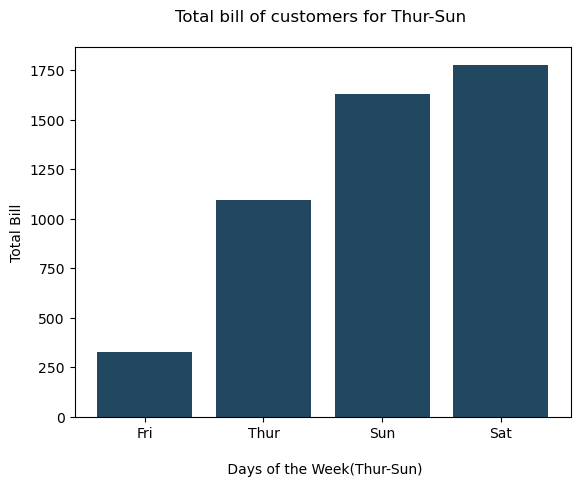

In [ ]:
# Plot total bill (y-axis) per day of the week (x-axis). 
# We only have to call a single line of code from matplotlib to produce the base graph. 
# We set the x-axis, y-axis, and the colour of the bars.
plt.bar(week_day, bill, color= '#214761')
     
# Set x and y-axis titles.
plt.ylabel('Total Bill')
plt.xlabel('\n Days of the Week(Thur-Sun)') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title.
plt.title('Total bill of customers for Thur-Sun \n')

# Show graph.
plt.show()

From the bar graph, we can see that the restaurant makes most of its money on the weekend. This is expected as Saturday and Sunday are usually the busiest days of the week for restaurants when people are off from work.  

### Pie chart

Next, we will plot a pie chart showing the proportion of the total meals served at the restaurant, and determine during which mealtime the server earned the most in tips.  

Let's start by preparing the data.

In [18]:
title_time = df.groupby('time')[['total_bill','tip','size']].sum() # Group and sum data by the number of values for each ‘time’ category
print(title_time)

        total_bill     tip  size
time                            
Dinner     3660.30  546.07   463
Lunch      1167.47  185.51   164


In [19]:
meal_time = title_time.tip.sort_values().index #Sort the indices 
tips = title_time.tip.sort_values() 

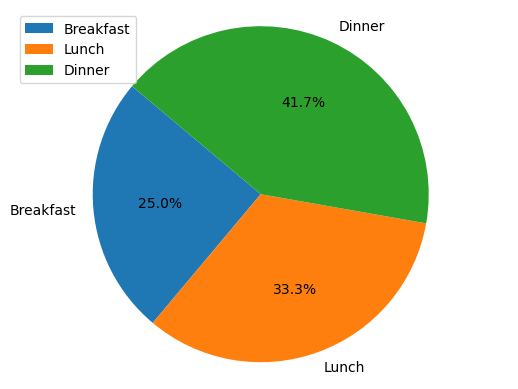

In [28]:
# Plot a pie chart.
# The `autopct` argument defines the format applied to the data labels. 
# The `startangle` argument determines which point in the pie to start plotting proportions from. 
# Full plot documentation can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html 
plt.pie(tips, labels = meal_time, autopct='%1.1f%%',  startangle=140)

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

### Pie vs donut charts

Donut charts are quite similar to pie charts except they contain a hole in their centre and display categories as arcs rather than slices. Donut charts are considered easier to interpret visually in comparison to pie charts. Let's visualise the same data using a **donut chart**. 

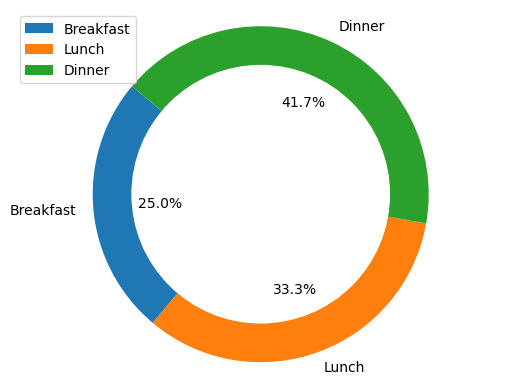

In [37]:
#Plot a donut chart

# Initially we create a pie chart as the base of our donut chart. 
plt.pie(tips, labels=meal_time, autopct='%1.1f%%', startangle=140)

# Next, we create a circle at the centre of the base plot.
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart.
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

From both the pie and donut chart, we can see that dinner was definitely the most profitable mealtime for the server. 

Having learned how to plot both pie and donut charts we can now use personal preference to decide which is more visually appealing and easy to interpret in our own data analysis projects. 

### Line graph

Suppose we now want to see how many meals were sold over six months at this busy restaurant. We can go ahead and create a dictionary of this information based on the `total_meals` sold at the restaurant from January to June 1990.  

In [38]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}

To visualise this data we can use a **line graph**:

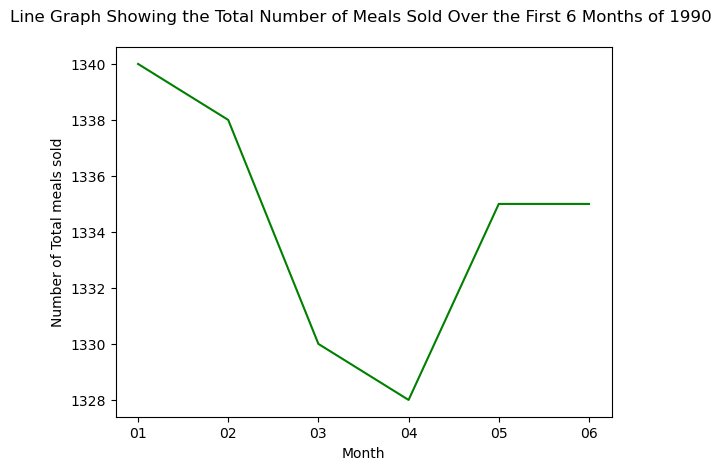

In [39]:
dates = list(total_meals.keys()) # Extract the dates (the dictionary keys of our data in this case)
x_ax = [date[3:5] for date in dates] # Extract the month from each date string
y_ax = list(total_meals.values()) # Extract the total number of meals consumed on each date as a Python list

# Plot the line graph.
plt.plot(x_ax, y_ax, color='green') 

# Set axis and graph titles.
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')

plt.show()

From the line plot, we observe successive decreases in the number of meals sold from January to April, with this last month representing the lowest number of sales. This is not coincidental as the Easter holidays are usually celebrated in April when people enjoy spending time with family and feasting on home-cooked meals instead of going out. 

### Scatter plot
As a final visual analysis, we will investigate if there is a relationship between the size of a group which visits the restaurant and the amount that the server gets tipped from this group. We can visually consider this relationship using a **scatter plot**.

Scatter plots are a powerful form of visualisation which allow us to view many data points at once. Typically, two variables are considered for a given dataset, with x and y-axis cartesian coordinates being used to place markers representing the data.  Additional variables can also be represented by adding further visual properties to the markers,  such as modifying their size, shape or colour.    

In the case of our scatter plot, we seek to observe both the bill total and the associated tip received for each data entry and to code these values based upon the related group size. We can use the first two variables for the plot's x and y-axis respectively and can represent the group size variable by using different marker colours.        


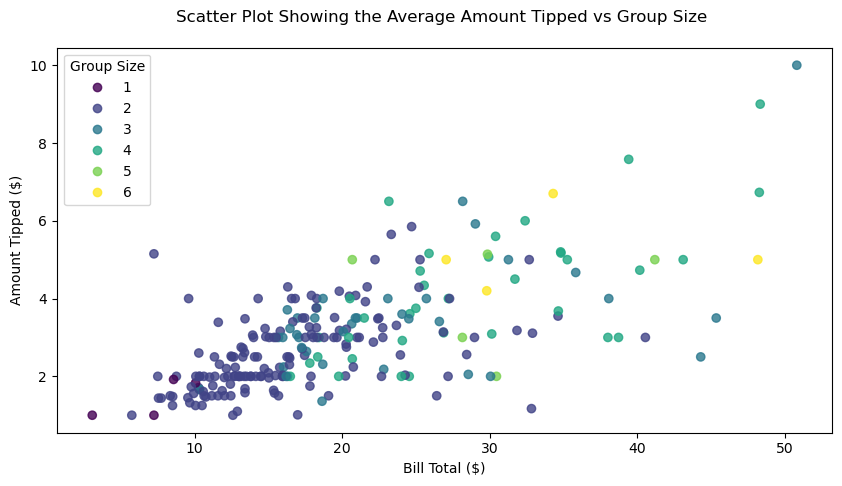

In [44]:
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the size of the plot. 
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatter plot, with the 'size' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(df['total_bill'], df['tip'], c=df['size'], alpha=0.8)

# We now create our legend based upon the underlying group size and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")

# Set graph and axis titles.
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')

plt.show()

This chart holds so much information! Firstly, we see a general trend that as the group size increases, so does the bill total and the amount tipped. Interestingly, the scatter plot fans out in a cone shape, indicating that as the bill increases, there is also more variance in the tips produced. Lastly, it is also surprising to note that the highest tips produced come from mid-sized groups (three to four individuals). This may represent a dynamic where larger groups tend to both order and tip less, based on the fact that the bill is either being generously picked up by one group member or split by the group as a whole. It's important to note that this last point is an assumption, however, and cannot be supported by the chart alone – highlighting the need for further data-driven analysis which often accompanies the evaluation of a visualisation.    

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/refs/heads/master/ALX_banners/ALX_Navy.png"  style="width:140px";/>
</div>